In [31]:

pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [32]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [33]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

<>:2: SyntaxWarning:

invalid escape sequence '\/'

<>:2: SyntaxWarning:

invalid escape sequence '\/'

/var/folders/d5/w2f5rky94_78qq3z_s0_m_8w0000gn/T/ipykernel_28027/823214970.py:2: SyntaxWarning:

invalid escape sequence '\/'



In [34]:
data = []
conversation = 'chat.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [35]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

         Date   Time      Author  \
75 2024-12-12  09:35  Jane Smith   
76 2024-12-12  09:36    John Doe   
77 2024-12-12  09:37  Jane Smith   
78 2024-12-12  09:38    John Doe   
79 2024-12-12  09:39  Jane Smith   
80 2024-12-12  09:40    John Doe   
81 2024-12-12  09:41  Jane Smith   
82 2024-12-12  09:42    John Doe   
83 2024-12-12  09:43  Jane Smith   
84 2024-12-12  09:44    John Doe   
85 2024-12-12  09:45  Jane Smith   
86 2024-12-12  09:46    John Doe   
87 2024-12-12  09:47  Jane Smith   
88 2024-12-12  09:48    John Doe   
89 2024-12-12  09:49  Jane Smith   
90 2024-12-12  09:50    John Doe   
91 2024-12-12  09:51  Jane Smith   
92 2024-12-12  09:52    John Doe   
93 2024-12-12  09:53  Jane Smith   
94 2024-12-12  09:54    John Doe   

                                              Message  
75                              Can’t wait to try it!  
76          It’s going to be amazing, I’m sure of it.  
77                                    [Media omitted]  
78  By the way, did

In [36]:
total_messages = df.shape[0]
print(total_messages)

95


In [37]:
media_messages = df[df["Message"]=='[Media omitted]'].shape[0]
print(media_messages)

15


In [38]:
pip install emoji --upgrade


Note: you may need to restart the kernel to use updated packages.


In [39]:
import emoji

def split_count(text):
    emoji_list = []
    data = regex.findall(r'\\X', text)
    for word in data:
        if any(emoji.is_emoji(char) for char in word):  # Use emoji.is_emoji instead of UNICODE_EMOJI
            emoji_list.append(word)
    return emoji_list

df['emoji'] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
print(emojis)


0


In [40]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Aman and Sapna")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between Aman and Sapna
Total Messages:  95
Number of Media Shared:  15
Number of Emojis Shared 0
Number of Links Shared 0


In [41]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Aman Kharwal", "Sapna"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)

Stats of Aman Kharwal -
Messages Sent 0
Average Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0
Stats of Sapna -
Messages Sent 0
Average Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0


/var/folders/d5/w2f5rky94_78qq3z_s0_m_8w0000gn/T/ipykernel_28027/3698927632.py:16: RuntimeWarning:

invalid value encountered in scalar divide

/var/folders/d5/w2f5rky94_78qq3z_s0_m_8w0000gn/T/ipykernel_28027/3698927632.py:16: RuntimeWarning:

invalid value encountered in scalar divide



In [42]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

There are 650 words in all the messages.


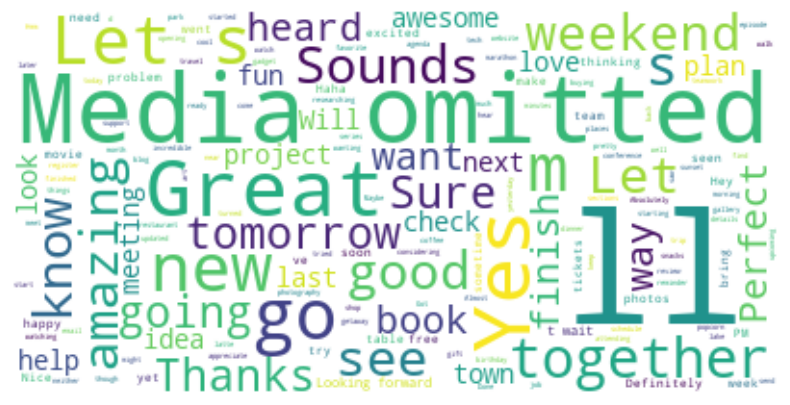

In [2]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load chat data
def load_chat(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    return lines

# Parse chat into a DataFrame
def parse_chat(lines):
    data = []
    for line in lines:
        try:
            date_time, rest = line.split(' - ', 1)
            author_message = rest.split(': ', 1)
            if len(author_message) == 2:
                author, message = author_message
            else:
                author, message = "System", author_message[0]
            data.append({"DateTime": date_time, "Author": author, "Message": message})
        except ValueError:
            # For lines that don't match the expected format
            continue
    return pd.DataFrame(data)

# File path to chat.txt
file_path = "chat.txt"
lines = load_chat(file_path)
messages_df = parse_chat(lines)

# Generate word cloud
text = " ".join(review for review in messages_df["Message"])
print(f"There are {len(text.split())} words in all the messages.")

# Create stopwords set
stopwords = set(STOPWORDS)

# Generate word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [4]:
l = ["Aman Kharwal", "Sapna"]  # List of authors
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]  # Filter messages by author
    print(f"Author: {l[i]}, Number of messages: {len(dummy_df)}")  # Debug info

    # Join all messages into a single string
    text = " ".join(review for review in dummy_df.Message)
    print(f"Author: {l[i]}, Text length: {len(text)}")  # Debug info

    # Skip authors with no messages
    if len(text.strip()) == 0:
        print(f"No messages found for {l[i]}. Skipping word cloud generation.")
        continue

    # Generate and display the word cloud
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    print(f"Word cloud generated for {l[i]}")
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {l[i]}")
    plt.show()


Author: Aman Kharwal, Number of messages: 0
Author: Aman Kharwal, Text length: 0
No messages found for Aman Kharwal. Skipping word cloud generation.
Author: Sapna, Number of messages: 0
Author: Sapna, Text length: 0
No messages found for Sapna. Skipping word cloud generation.
